### CP18 - Time complexity of algorithms 

#### Task 1
            
Write code to produce n distinct random strings comprising 10 distinct lowercase characters each, chosen from 'a' to 'z'.

Write the generated string to a file named ``task1_n.txt`` where n is the number of strings. Each line in the file contains the string.

Generate files with 1000, 2000 ... to 9000, 10000 strings.


#### Task 2

Write a function ```task2(filename)``` that accepts an argument ```filename```. 

The function reads the content of the file and return a list of strings. 

The file contains a string in each line.


#### Task 3
Write a function ```insertionSort(A)``` that accepts a list of strings and sort the list of strings in ascending order using **insertion sort algorithm**. 


In [1]:
## test insertionSort       
#A=['x','a','t','z','w','j','m','e','v','q']
#insertionSort(A)
#for n in A:
#    print(n)

#### Task 4
Write a function ```quickSort(A)``` that accepts a list of strings and sort the list of strings in ascending order using **quick sort algorithm**. 


In [2]:
### test quicksort
#A=['x','a','t','z','w','j','m','e','v','q']
#quickSort(A)
#for n in A:
#    print(n)

#### Task 5
Write a function ```bubbleSort(A)``` that accepts a list of strings and sort the list of strings in ascending order using ***bubble sort algorithm***.


In [3]:
#### test bubbleSort
#A=['x','a','t','z','w','j','m','e','v','q']
##bubbleSort(A)
#for n in A:
#    print(n)

#### Task 6
Write a function ```mergeSort(A)``` that accepts a list of strings and sort the list of strings in ascending order using ***merge sort algorithm***.


In [4]:
#A=['x','a','t','z','w','j','m','e','v','q']
#mergeSort(A)
#for n in A:
#    print(n)

#### Task 7

The ```timeit``` library is built int Python and can be used to time simple functions calls. The example code is as shown:
```
# import the built-in library timeit 
import timeit

# use the function from Task 2 to read in 1000 strings from the file task1_1000.txt 
t1000 = task2('task1_1000.txt')

# use the timeit function to call the quickSort(t1000) function with the list of 1000 strings, run this just once 

time1000 = timeit.timeit(lambda: quickSort(t1000), number=1)

# print out the time, in seconds

print(time1000)

```
Using the ```timeit``` module and the generated files to compare and contrast the time complexity of the sorting algorithms.

Measure the time it takes for each sorting algorithm to sort the files that contains 1000, 2000 ... to 9000, 10000 strings. Take an average time of 10 runs for each algorithm and file.

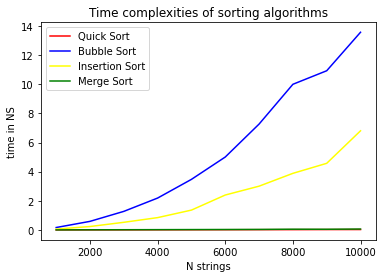

In [65]:
# no need to plot graph if you don't have matplotlib module


